#  EDA - Energy Consumption Analysis Report

## 1. Data Preprocessing

The training and test datasets were merged into a single DataFrame 

Missing Data: There were no null values in the combined dataset

Duplicate Rows: No duplicate rows

---
## 2. One hot encoding: 
Two columns, Building Type and Day, were categorized as object transformed into int type  using one-hot encoding

### Dataset visualization: 

a. Pairplot Analysis

b. Energy Consumption vs. Square Footage

c. Energy Consumption vs. Average Temperature

d. Energy Consumption Distribution

e. Energy Consumption varying - Bar graph

f. Square Footage vs Density

g. Temperature Matrix 

---
## 3. Dataset Splitting

The combined dataset was split into training and test sets. 

---
## 4. Conclusion

(a) Energy Consumption by Building Type:

Industrial buildings consume the most energy, followed by commercial and residential buildings.

(b) Weekend Trends:

Energy consumption is lower on weekends

(c) Square Footage: Larger square footage consumes higher energy consumption

(d) Number of Occupants: Higher occupancy leads to increased energy usage

(e) Appliances Used: The quantity and type of appliances directly influence energy consumption

(f) Average Temperature: Temperature variations create seasonal energy demand patterns, with extreme weather conditions leading to  more energy usage.

(g) Energy Consumption: varies more with Square Footage

---


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df1 = pd.read_csv('/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv')
df2 = pd.read_csv('/kaggle/input/energy-consumption-dataset-linear-regression/train_energy_data.csv')
df1
df2


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


## combined test and train datasets to create a single df

In [7]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
1095,Residential,14419,68,44,23.95,Weekend,3661.21
1096,Industrial,12194,7,22,14.67,Weekend,3546.34
1097,Commercial,39562,88,20,32.18,Weekday,5147.21
1098,Residential,8348,67,37,16.48,Weekend,3244.98


In [8]:
print(combined_df.isnull().sum())

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


In [9]:
print(combined_df.duplicated().sum())

0


In [10]:
combined_df.dtypes


Building Type           object
Square Footage           int64
Number of Occupants      int64
Appliances Used          int64
Average Temperature    float64
Day of Week             object
Energy Consumption     float64
dtype: object

In [11]:
combined_df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


In [12]:

print(combined_df['Building Type'].unique())
print(combined_df['Day of Week'].unique())


['Residential' 'Commercial' 'Industrial']
['Weekday' 'Weekend']


## one hot encoding done because building type and day are objects 

In [13]:
encoded_df = pd.get_dummies(combined_df, columns=['Building Type', 'Day of Week'], drop_first=True)
encoded_df = encoded_df.astype(int)
encoded_df

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28,2865,0,1,0
1,27583,56,23,23,4283,0,0,1
2,45313,4,44,33,5067,0,0,0
3,41625,84,17,27,4624,0,1,1
4,36720,58,47,17,4820,0,1,0
...,...,...,...,...,...,...,...,...
1095,14419,68,44,23,3661,0,1,1
1096,12194,7,22,14,3546,1,0,1
1097,39562,88,20,32,5147,0,0,0
1098,8348,67,37,16,3244,0,1,1


In [14]:
encoded_df.dtypes

Square Footage               int64
Number of Occupants          int64
Appliances Used              int64
Average Temperature          int64
Energy Consumption           int64
Building Type_Industrial     int64
Building Type_Residential    int64
Day of Week_Weekend          int64
dtype: object

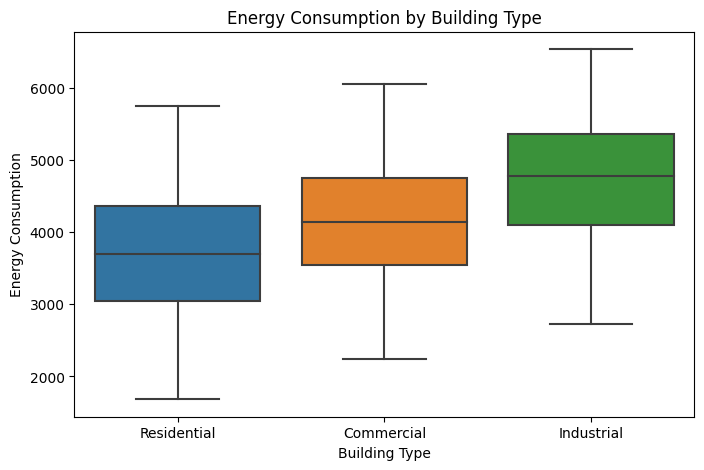

In [15]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Building Type', y='Energy Consumption', data=combined_df)
plt.title('Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption')
plt.show() 

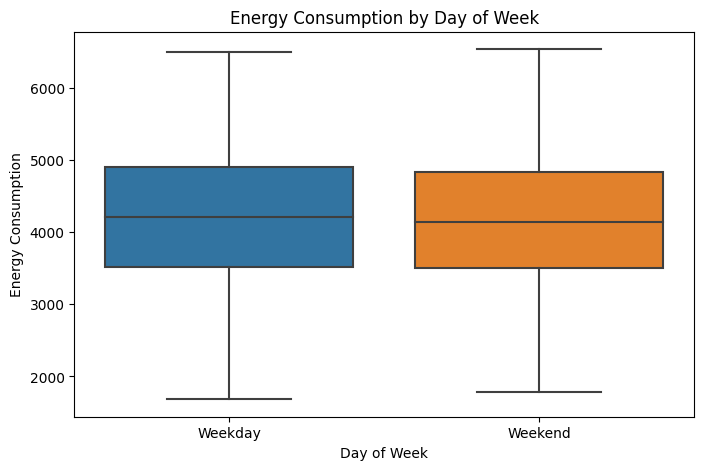

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day of Week', y='Energy Consumption', data=combined_df)
plt.title('Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.show()


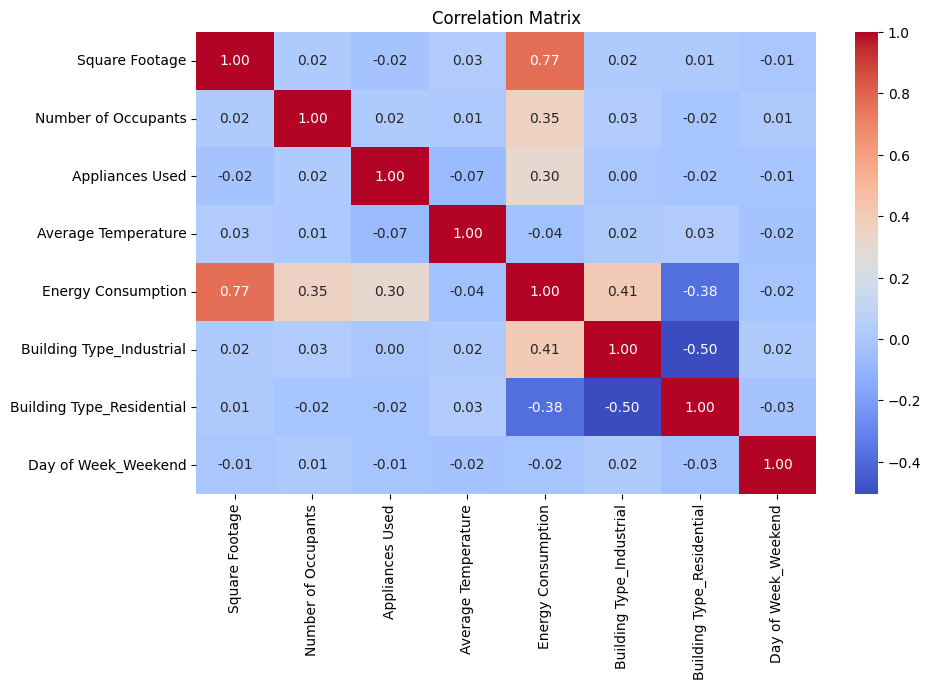

In [17]:
corr = encoded_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

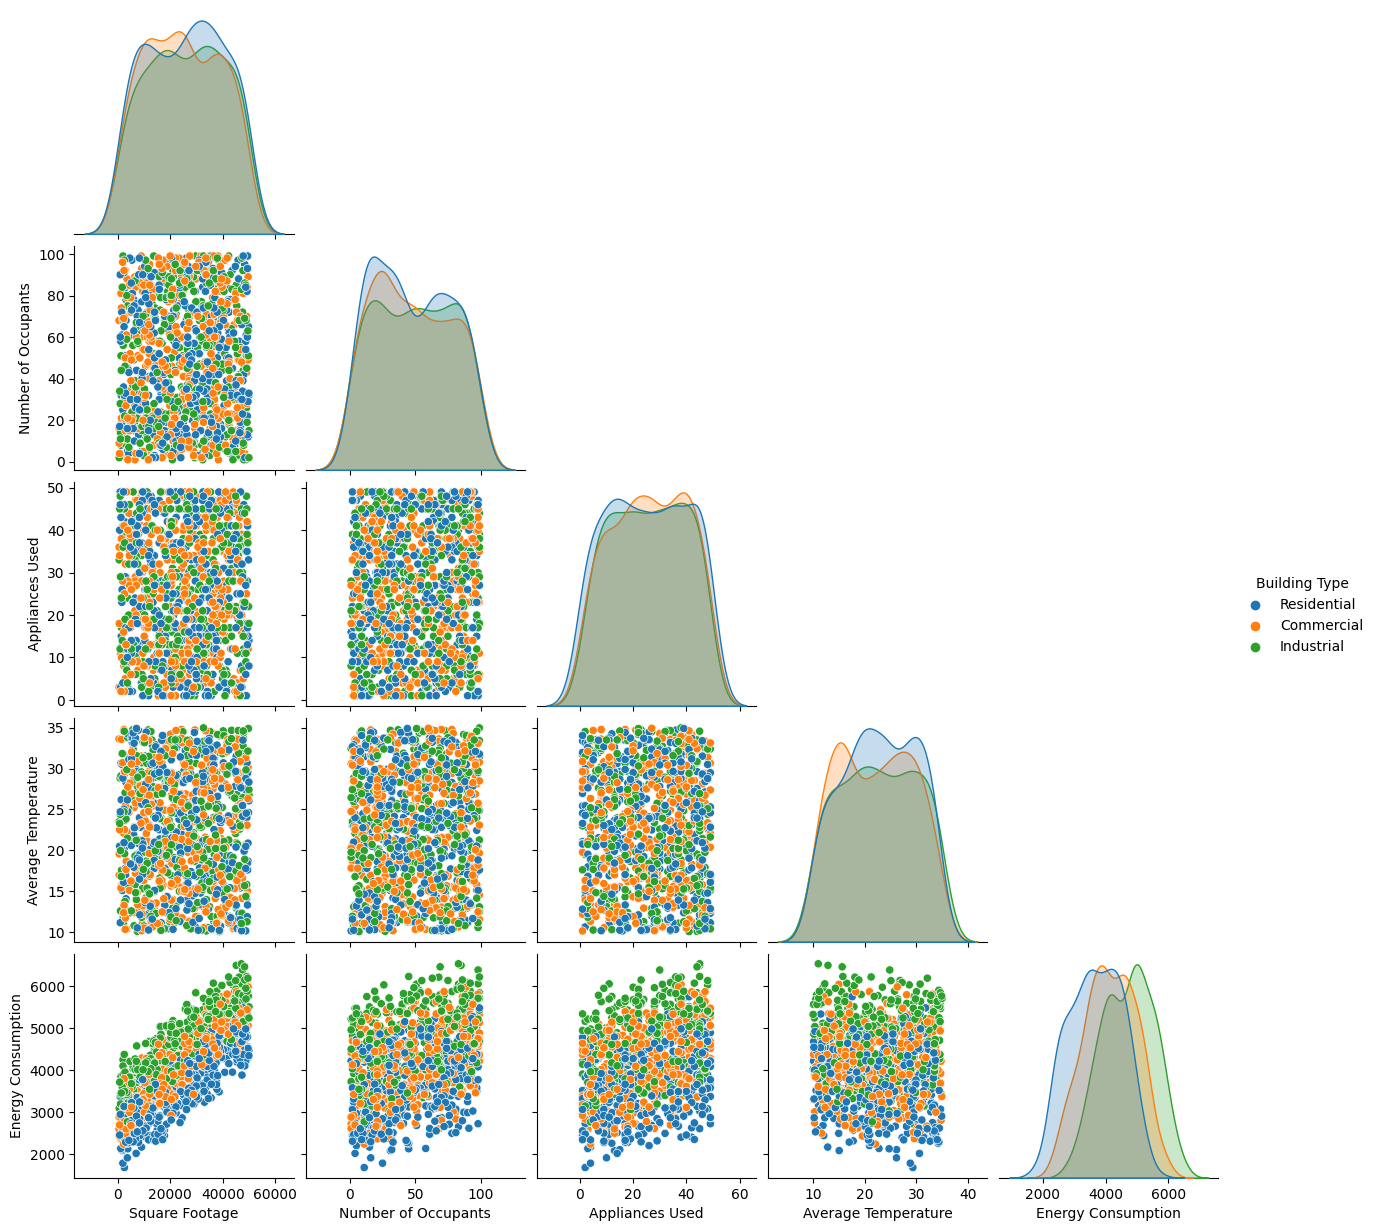

In [18]:
sns.pairplot(combined_df, diag_kind='kde', hue='Building Type', corner=True)
plt.show()


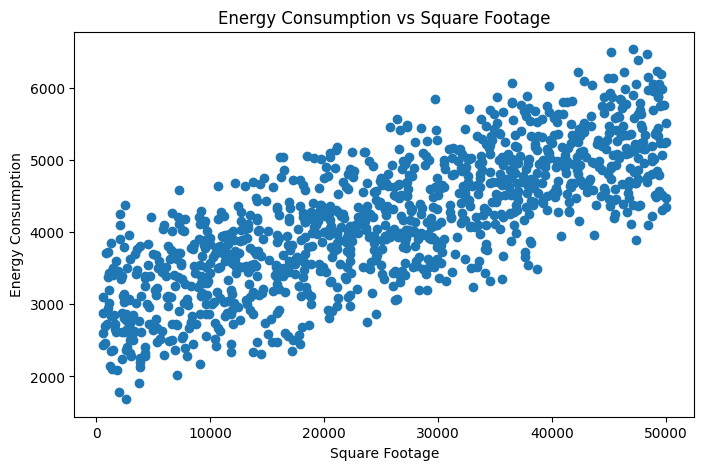

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(combined_df['Square Footage'], combined_df['Energy Consumption'])
plt.title('Energy Consumption vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.show()


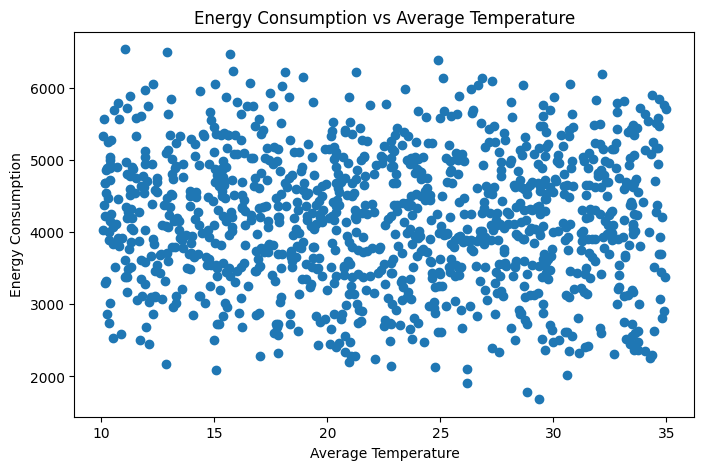

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(combined_df['Average Temperature'], combined_df['Energy Consumption'])
plt.title('Energy Consumption vs Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Energy Consumption')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


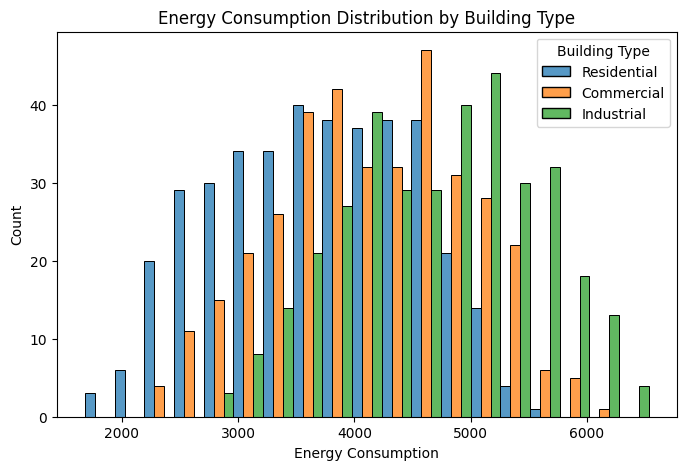

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(combined_df, x='Energy Consumption', hue='Building Type', multiple='dodge')
plt.title('Energy Consumption Distribution by Building Type')
plt.show()


<Axes: >

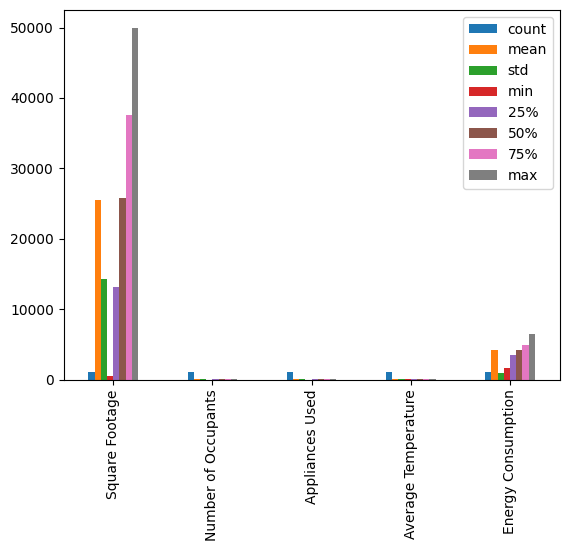

In [21]:
combined_df.describe().T.plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Square Footage', ylabel='Density'>

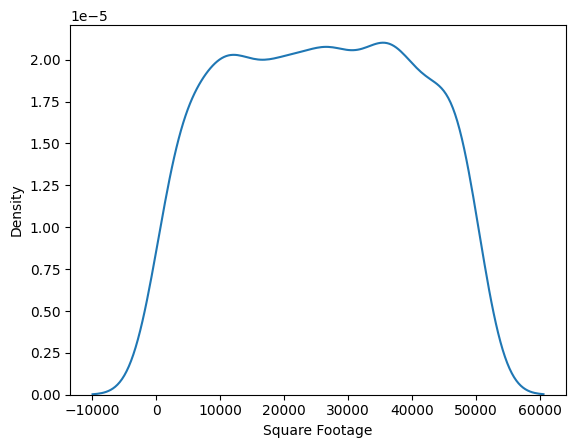

In [27]:

sns.kdeplot(combined_df['Square Footage'])

In [22]:
encoded_df

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28,2865,0,1,0
1,27583,56,23,23,4283,0,0,1
2,45313,4,44,33,5067,0,0,0
3,41625,84,17,27,4624,0,1,1
4,36720,58,47,17,4820,0,1,0
...,...,...,...,...,...,...,...,...
1095,14419,68,44,23,3661,0,1,1
1096,12194,7,22,14,3546,1,0,1
1097,39562,88,20,32,5147,0,0,0
1098,8348,67,37,16,3244,0,1,1


In [23]:
X = encoded_df.drop(columns=['Energy Consumption'])
y = encoded_df['Energy Consumption']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


print(f"Training Features shape: {X_train.shape}")
print(f"Testing Features shape: {X_test.shape}")
print(f"Training Target shape: {y_train.shape}")
print(f"Testing Target shape: {y_test.shape}")

Training Features shape: (880, 7)
Testing Features shape: (220, 7)
Training Target shape: (880,)
Testing Target shape: (220,)
